In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler

In [2]:
# Step 1: Load and preprocess the dataset (first 10,000 rows)
df = pd.read_csv("C:\\Users\\DELL\\OneDrive\\Desktop\\INTERNSHIP ASSIGNMENTS\\complaints.csv")

# Step 2: Check basic dataset information
print("Dataset Info:")
print(df.info())
# Step 3: Check the first few rows of the dataset
print("\nFirst 5 Rows:")
print(df.head())

# Step 4: Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4074817 entries, 0 to 4074816
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memo

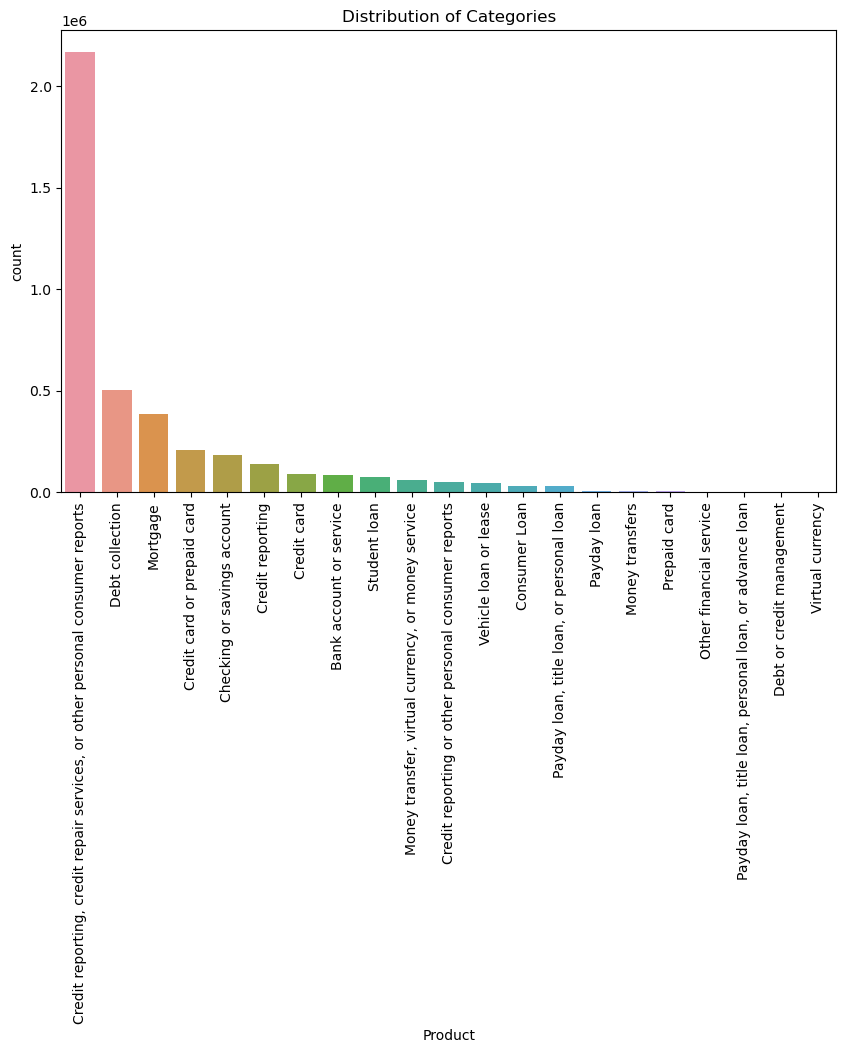

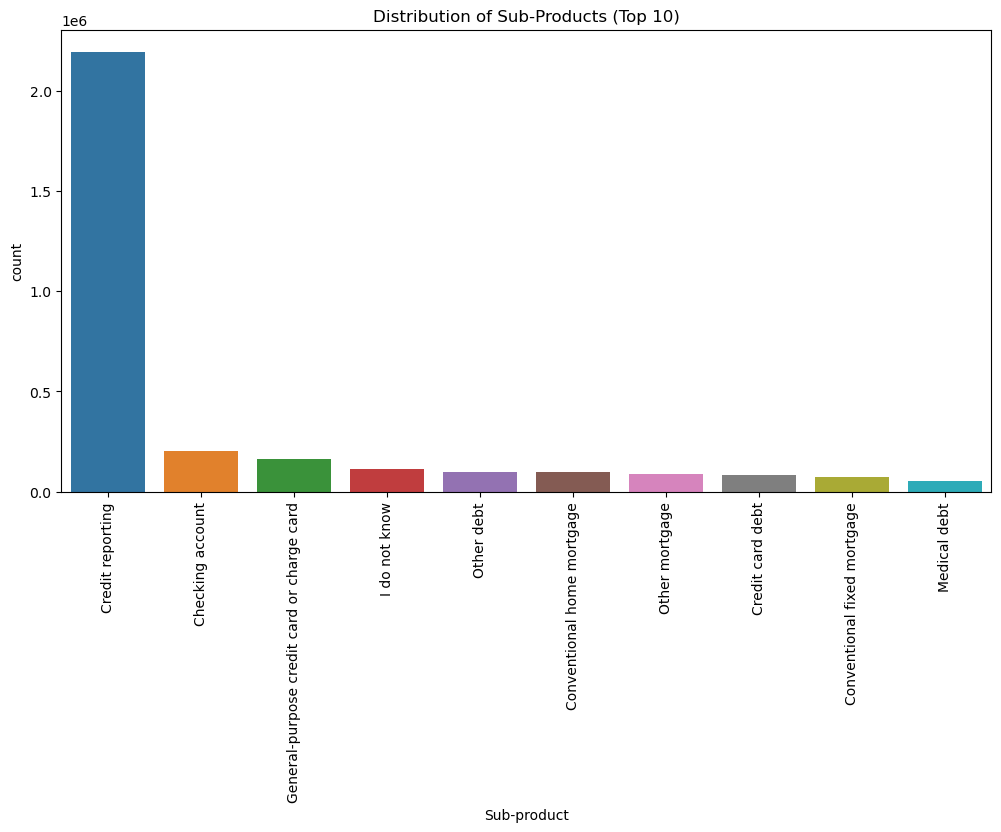

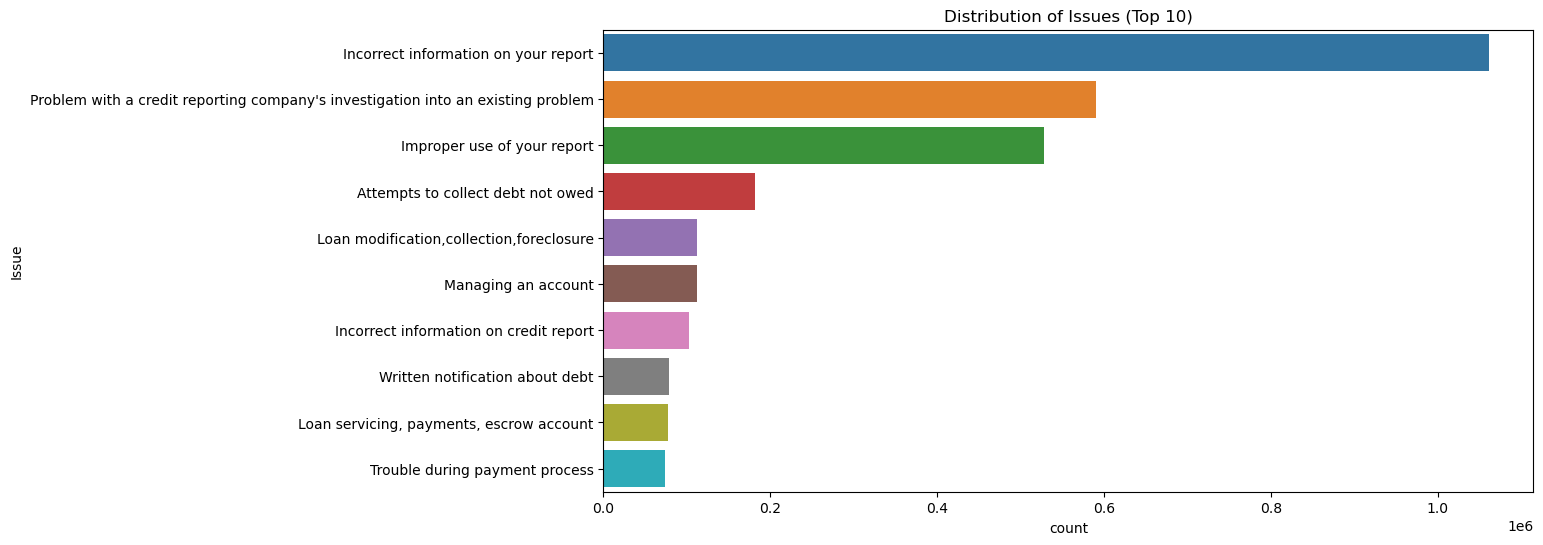

In [3]:
# Step 5: Visualize the distribution of categories (Product)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Product', order=df['Product'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Categories')
plt.show()

# Step 6: Visualize the distribution of sub-products
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Sub-product', order=df['Sub-product'].value_counts().index[:10])
plt.xticks(rotation=90)
plt.title('Distribution of Sub-Products (Top 10)')
plt.show()

# Step 7: Visualize the distribution of issues
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Issue', order=df['Issue'].value_counts().index[:10])
plt.title('Distribution of Issues (Top 10)')
plt.show()

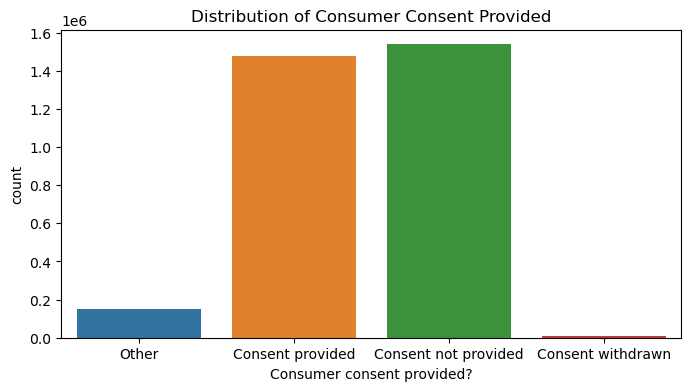

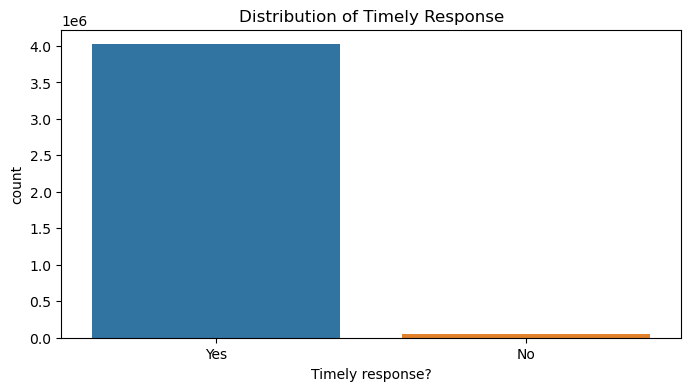

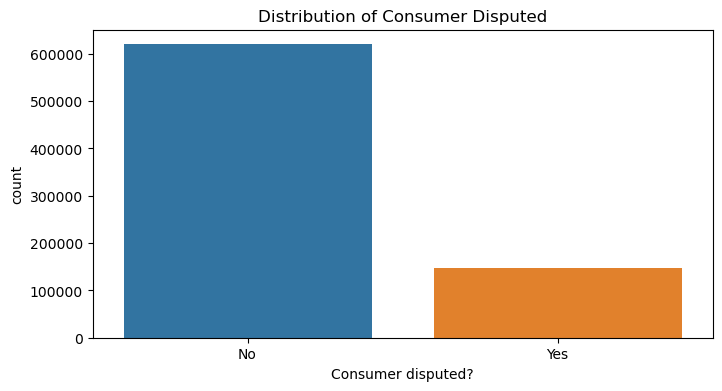

In [4]:
# Step 8: Visualize the distribution of consumer consent provided
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Consumer consent provided?')
plt.title('Distribution of Consumer Consent Provided')
plt.show()

# Step 9: Visualize the distribution of timely response
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Timely response?')
plt.title('Distribution of Timely Response')
plt.show()

# Step 10: Visualize the distribution of consumer disputed
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Consumer disputed?')
plt.title('Distribution of Consumer Disputed')
plt.show()





In [5]:
# Step 2: Text Pre-processing
df['Consumer complaint narrative'] = df['Consumer complaint narrative'].fillna('')

# Step 3: Split the data into training and testing sets
X = df['Consumer complaint narrative']
y = df['Product']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Step 4: Text Vectorization using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english', ngram_range=(1, 2))
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [7]:
# Step 5: Oversampling for Class Imbalance
from imblearn.under_sampling import RandomUnderSampler

# Use RandomUnderSampler to balance the dataset
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_tfidf, y_train)
#oversampler = RandomOverSampler(random_state=42)
#X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_tfidf, y_train)

In [8]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  # Import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
# Step 6: Model Selection and Comparison
classifiers = [
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)),  # Set n_jobs to -1 for parallel processing
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('SVM', SVC(random_state=42))
]

best_classifier = None
best_accuracy = 0

for name, classifier in classifiers:
    # Create a pipeline with the classifier
    pipeline = Pipeline([
        ('classifier', classifier)
    ])
    
    # Fit the classifier on the resampled training data
    pipeline.fit(X_train_resampled, y_train_resampled)
    
    # Evaluate the classifier on the test set
    y_pred = pipeline.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"{name} Accuracy: {accuracy}")
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_classifier = pipeline

Random Forest Accuracy: 0.12249007318114666
Gradient Boosting Accuracy: 0.08919780505641967
SVM Accuracy: 0.0028516597052139726


In [13]:
# Step 7: Model Evaluation and Prediction

# Evaluate the best classifier on the test set
y_pred = best_classifier.predict(X_test_tfidf)

# Step 8: Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Accuracy: 0.12249007318114666

Confusion Matrix:
 [[   274    129    230     32    314      1      0     50     60      1
     182     78     43      6     13    276  14135     45     33    268
    1001]
 [   859   2099    200     87   1716      2      0    146    332     31
    1174    298    230     14     76   1175  21405    155    106   1703
    4718]
 [    26     43    215      8    122      0      0    146     50      4
      17     14     26      1     33    619   4431      5    107    293
     199]
 [   141    115    285    178   1016      2      0    203     99      1
      98     42     39      0     37    527  14492     75     16    304
     660]
 [   753   1867    458    722   5294      2      0    866    450     20
     770    276    343      3    171   2343  20100    451    102   2393
    4001]
 [   204    127    171     24    641      3      0   2640    494      8
      67     43     76      4     35    565  21951     22    134    287
     647]
 [     0      0      0    

In [14]:
# Step 9: Prediction (You can use this to make predictions on new data)
new_complaints = ["I have an issue with my mortgage payment.",
                   "I believe there is an error in my credit report.",
                   "I want to inquire about a personal loan application."]

# Vectorize the new complaints using the same TF-IDF vectorizer
new_complaints_tfidf = tfidf_vectorizer.transform(new_complaints)

# Predict the categories for the new complaints using the best classifier
predicted_categories = best_classifier.predict(new_complaints_tfidf)

for complaint, category in zip(new_complaints, predicted_categories):
    print(f"Complaint: {complaint}\nPredicted Category: {category}\n")

# You can now use the best_classifier to make predictions on new complaints.

Complaint: I have an issue with my mortgage payment.
Predicted Category: Prepaid card

Complaint: I believe there is an error in my credit report.
Predicted Category: Credit reporting, credit repair services, or other personal consumer reports

Complaint: I want to inquire about a personal loan application.
Predicted Category: Payday loan, title loan, or personal loan

